In [ ]:
widgets.Widget.close_all()

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [ ]:
df = pd.read_csv('premier-player-23-24.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       580 non-null    object 
 1   Nation       580 non-null    object 
 2   Pos          580 non-null    object 
 3   Age          580 non-null    float64
 4   MP           580 non-null    int64  
 5   Starts       580 non-null    int64  
 6   Min          580 non-null    float64
 7   90s          580 non-null    float64
 8   Gls          580 non-null    float64
 9   Ast          580 non-null    float64
 10  G+A          580 non-null    float64
 11  G-PK         580 non-null    float64
 12  PK           580 non-null    float64
 13  PKatt        580 non-null    float64
 14  CrdY         580 non-null    float64
 15  CrdR         580 non-null    float64
 16  xG           580 non-null    float64
 17  npxG         580 non-null    float64
 18  xAG          580 non-null    float64
 19  npxG+xAG

In [ ]:
#check duplicates
df.duplicated().sum()

0

### The Data has no duplicates or missing value, and the columns formats are good




---


# Player Performance Analysis

---





This code show you: (Average goals per 90min,Average Asists per 90min,Average goals + asists per 90min,)  for a player you choose

And compare the player with the average numbers for players in the same Position

**I did not considers players with GK position, its logic that the Gool keapers dont have goals and Asists**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming df is your DataFrame with player data
# Calculate average metrics excluding Goalkeepers
average_gls_per_90 = df[df['Pos'] != 'GK']['Gls_90'].mean()
average_ast_per_90 = df[df['Pos'] != 'GK']['Ast_90'].mean()
average_g_a_per_90 = df[df['Pos'] != 'GK']['G+A_90'].mean()

# Function to display metrics and plot comparison
def display_gls_per_90(player_name):
    if player_name in df['Player'].values:
        player_data = df[df['Player'] == player_name].iloc[0]
        position = player_data['Pos']
        if position != 'GK':
            print(f"Position: {position}")
            # Player metrics
            gls_per_90 = player_data['Gls_90']
            ast_per_90 = player_data['Ast_90']
            g_a_per_90 = player_data['G+A_90']
            print(f"Goals per 90 Minutes: {gls_per_90:.2f}")
            print(f"Assists per 90 Minutes: {ast_per_90:.2f}")
            print(f"Goals + Assists per 90 Minutes: {g_a_per_90:.2f}")
            # Filter for players in the same position
            position_df = df[df['Pos'] == position]
            position_average_gls_per_90 = position_df['Gls_90'].mean()
            position_average_ast_per_90 = position_df['Ast_90'].mean()
            position_average_g_a_per_90 = position_df['G+A_90'].mean()
            # Create a DataFrame for plotting
            metrics_df = pd.DataFrame({
                'Metric': ['Goals per 90 Minutes', 'Assists per 90 Minutes', 'Goals + Assists per 90 Minutes'],
                'Player Value': [gls_per_90, ast_per_90, g_a_per_90],
                'Position Average Value': [position_average_gls_per_90, position_average_ast_per_90, position_average_g_a_per_90]
            })
            # Plotting
            plt.figure(figsize=(12, 6))
            metrics_df.set_index('Metric').plot(kind='bar', figsize=(12, 6), rot=0)
            plt.title(f'Comparison of {player_name} with Average Metrics for Position {position}')
            plt.ylabel('Value')
            plt.legend(title='Metric')
            plt.tight_layout()
            plt.show()
        else:
            print("Player is a Goalkeeper. Metrics are not available for Goalkeepers.")
    else:
        print("Player not found.")

# Create a dropdown widget for player names
player_dropdown = widgets.Dropdown(
    options=df[df['Pos'] != 'GK']['Player'].tolist(),  # Filter dropdown options to exclude Goalkeepers
    description='Player:',
    disabled=False,
)

# Create an output widget to display the result
output = widgets.Output()

# Function to update the output based on dropdown selection
def on_player_selected(change):
    with output:
        print(f"Dropdown changed to: {change['new']}")  # Debugging print statement
        output.clear_output()
        display_gls_per_90(change['new'])

# Attach the function to the dropdown widget
player_dropdown.observe(on_player_selected, names='value')

# Display the widgets
display(player_dropdown, output)

# Automatically display the metrics for the first player
with output:
    display_gls_per_90(player_dropdown.options[0])


Dropdown(description='Player:', options=('Rodri', 'Phil Foden', 'Julián Álvarez', 'Kyle Walker', 'Bernardo Sil…

Output()



---

This code show you:
Number of times the player carried the ball forward.
Number of passes made by the player that moved the ball forward.
Number of times the player made runs forward with the ball.

And compare the player with the average numbers for players in the same Position

**I did not considers players with GK position**

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

# Calculate average progressive actions excluding Goalkeepers
average_prgc = df[df['Pos'] != 'GK']['PrgC'].mean()
average_prgp = df[df['Pos'] != 'GK']['PrgP'].mean()
average_prgr = df[df['Pos'] != 'GK']['PrgR'].mean()

# Function to display progressive actions and plot comparison
def display_progressive_actions(player_name):
    if player_name in df['Player'].values:
        player_data = df[df['Player'] == player_name].iloc[0]
        position = player_data['Pos']

        if position != 'GK':
            print(f"Position: {position}")

            # Player metrics
            prgc = player_data['PrgC']
            prgp = player_data['PrgP']
            prgr = player_data['PrgR']

            print(f"Progressive Carries: {prgc:.2f}")
            print(f"Progressive Passes: {prgp:.2f}")
            print(f"Progressive Runs: {prgr:.2f}")

            # Filter for players in the same position
            position_df = df[df['Pos'] == position]
            position_average_prgc = position_df['PrgC'].mean()
            position_average_prgp = position_df['PrgP'].mean()
            position_average_prgr = position_df['PrgR'].mean()

            # Create a DataFrame for plotting
            metrics_df = pd.DataFrame({
                'Metric': ['Progressive Carries', 'Progressive Passes', 'Progressive Runs'],
                'Player Value': [prgc, prgp, prgr],
                'Position Average Value': [position_average_prgc, position_average_prgp, position_average_prgr]
            })

            # Plotting
            plt.figure(figsize=(12, 6))

            # Plot for player metrics vs position averages
            metrics_df.set_index('Metric').plot(kind='bar', figsize=(12, 6), rot=0)
            plt.title(f'Comparison of {player_name} with Average Progressive Actions for Position {position}')
            plt.ylabel('Count')
            plt.legend(title='Metric')
            plt.tight_layout()
            plt.show()

        else:
            print("Player is a Goalkeeper. Progressive action metrics are not available for Goalkeepers.")
    else:
        print("Player not found.")

# Create a dropdown widget for player names
player_dropdown = widgets.Dropdown(
    options=df[df['Pos'] != 'GK']['Player'].tolist(),  # Filter dropdown options to exclude Goalkeepers
    description='Player:',
    disabled=False,
)

# Create an output widget to display the result
output = widgets.Output()

# Function to update the output based on dropdown selection
def on_player_selected(change):
    with output:
        output.clear_output()
        display_progressive_actions(change.new)

# Attach the function to the dropdown widget
player_dropdown.observe(on_player_selected, names='value')

# Display the widgets
display(player_dropdown, output)

# Automatically display the metrics for the first player
with output:
    display_progressive_actions(player_dropdown.options[2])


Dropdown(description='Player:', options=('Rodri', 'Phil Foden', 'Julián Álvarez', 'Kyle Walker', 'Bernardo Sil…

Output()



---

**This section to compare the actual Metrics for each player with the expected value**

Also i print the real and expected values

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Calculate average metrics excluding Goalkeepers
average_gls_per_90 = df[df['Pos'] != 'GK']['Gls_90'].mean()
average_ast_per_90 = df[df['Pos'] != 'GK']['Ast_90'].mean()
average_g_a_per_90 = df[df['Pos'] != 'GK']['G+A_90'].mean()

# Function to display metrics and plot comparison
def display_gls_per_90(player_name):
    if player_name in df['Player'].values:
        player_data = df[df['Player'] == player_name].iloc[0]
        position = player_data['Pos']

        if position != 'GK':
            print(f"Position: {position}")

            # Player real metrics
            gls_per_90 = player_data['Gls_90']
            ast_per_90 = player_data['Ast_90']
            g_a_per_90 = player_data['G+A_90']

            # Player expected metrics
            xg_per_90 = player_data['xG_90']  # Assuming xG_90 is present in your data
            xag_per_90 = player_data['xAG_90']  # Assuming xAG_90 is present in your data
            npxg_xag_per_90 = player_data['xG+xAG_90']  # Assuming npxG_xAG_90 is present in your data

            print(f"Actual Goals per 90 Minutes: {gls_per_90:.2f}")
            print(f"Expected Goals per 90 Minutes: {xg_per_90:.2f}")
            print(f"Actual Assists per 90 Minutes: {ast_per_90:.2f}")
            print(f"Expected Assists per 90 Minutes: {xag_per_90:.2f}")
            print(f"Actual Goals + Assists per 90 Minutes: {g_a_per_90:.2f}")
            print(f"Expected Goals + Assists per 90 Minutes: {npxg_xag_per_90:.2f}")

            # Create a DataFrame for plotting
            metrics_df = pd.DataFrame({
                'Metric': [
                    'Goals per 90 Minutes',
                    'Assists per 90 Minutes',
                    'Goals + Assists per 90 Minutes'
                ],
                'Actual': [
                    gls_per_90,
                    ast_per_90,
                    g_a_per_90
                ],
                'Expected': [
                    xg_per_90,
                    xag_per_90,
                    npxg_xag_per_90
                ]
            })

            # Plotting
            plt.figure(figsize=(12, 6))

            # Plot for actual vs expected metrics
            metrics_df.set_index('Metric').plot(kind='bar', figsize=(12, 6), rot=0)
            plt.title(f'Comparison of Actual vs Expected Metrics for {player_name}')
            plt.ylabel('Value')
            plt.tight_layout()
            plt.show()

        else:
            print("Player is a Goalkeeper. Metrics are not available for Goalkeepers.")
    else:
        print("Player not found.")

# Create a dropdown widget for player names
player_dropdown = widgets.Dropdown(
    options=df[df['Pos'] != 'GK']['Player'].tolist(),  # Filter dropdown options to exclude Goalkeepers
    description='Player:',
    disabled=False,
)

# Create an output widget to display the result
output = widgets.Output()

# Function to update the output based on dropdown selection
def on_player_selected(change):
    with output:
        output.clear_output()
        display_gls_per_90(change.new)

# Attach the function to the dropdown widget
player_dropdown.observe(on_player_selected, names='value')

# Display the widgets
display(player_dropdown, output)


Dropdown(description='Player:', options=('Rodri', 'Phil Foden', 'Julián Álvarez', 'Kyle Walker', 'Bernardo Sil…

Output()



---

**Here you can see the top 10 players for each position acording to Goals per 90 min**

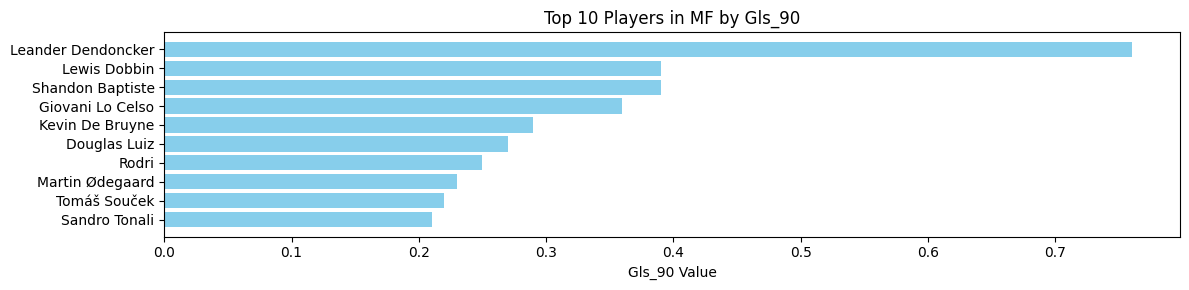

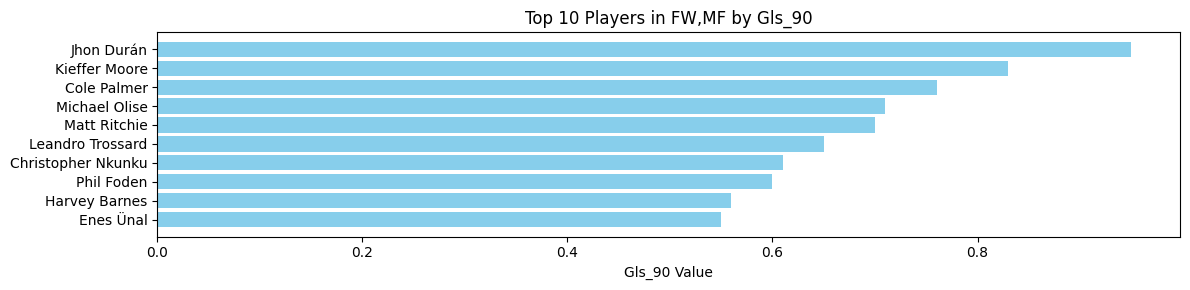

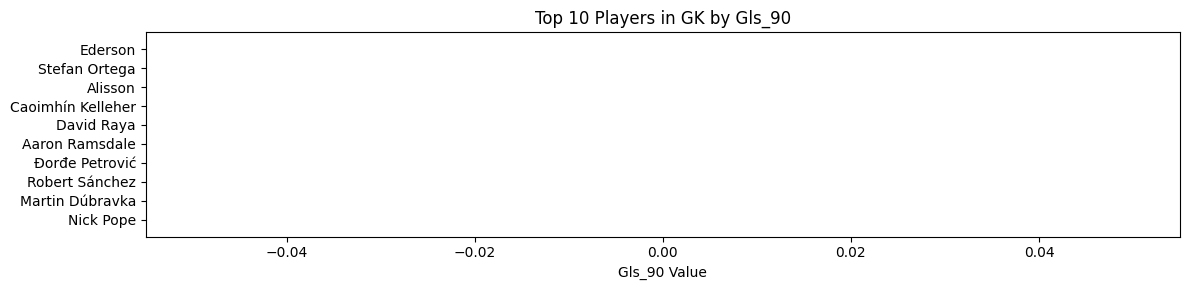

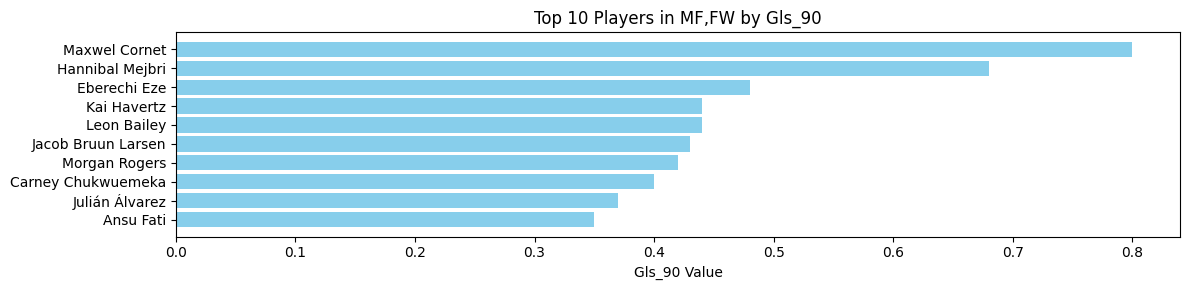

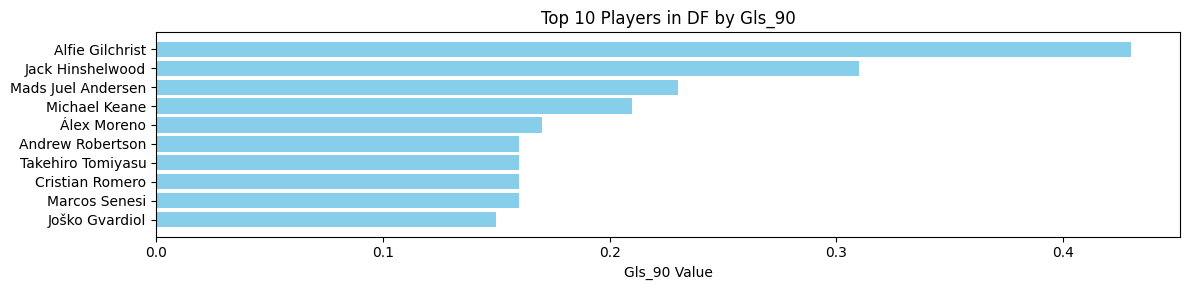

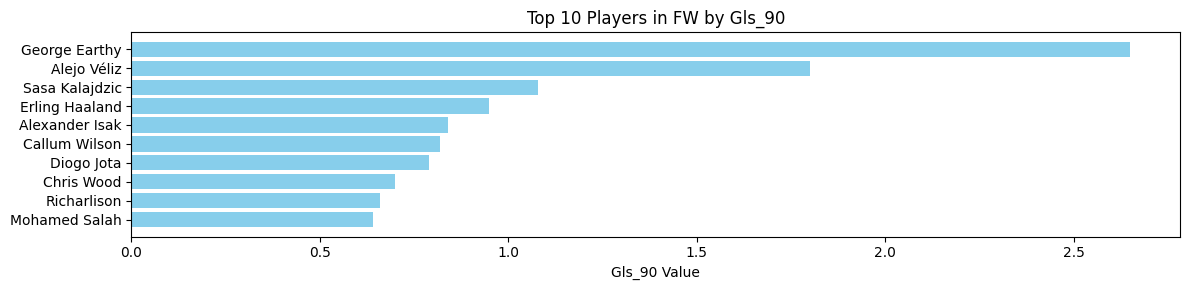

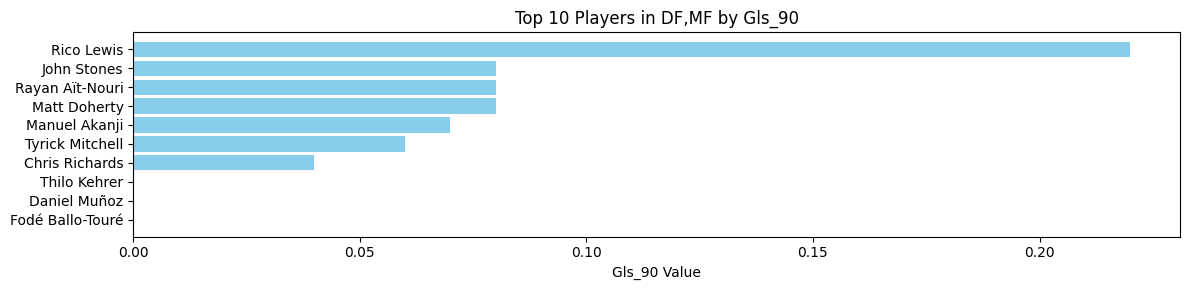

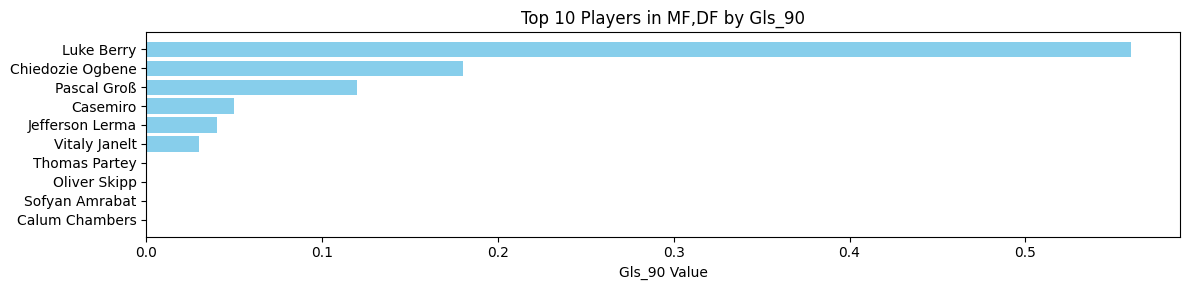

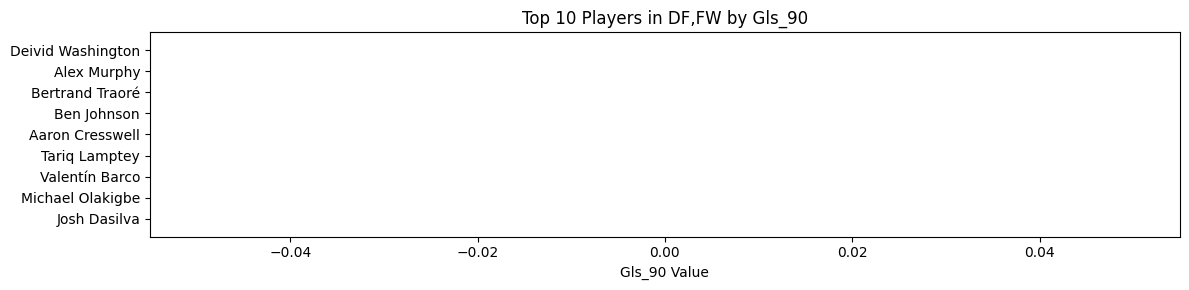

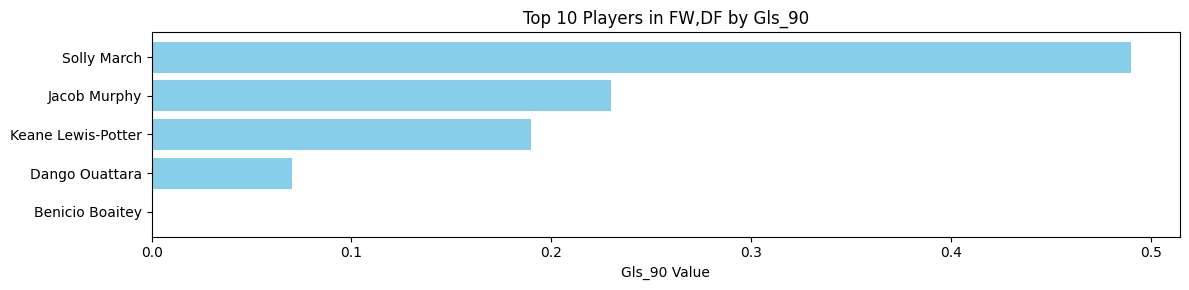

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure you have your DataFrame 'df' loaded with the relevant data
# For this example, I'm assuming 'df' is already defined and contains the data

def plot_top_players_by_pos(df, metric='Gls_90', top_n=10):
    # Get unique positions
    positions = df['Pos'].unique()

    for position in positions:
        # Filter data for the current position
        position_df = df[df['Pos'] == position]

        # Sort by the selected metric in descending order and get top N players
        top_players_df = position_df.nlargest(top_n, metric)

        # Create a bar chart for the top players
        plt.figure(figsize=(12, 3))
        plt.barh(top_players_df['Player'], top_players_df[metric], color='skyblue')
        plt.xlabel(f'{metric} Value')
        plt.title(f'Top {top_n} Players in {position} by {metric}')
        plt.gca().invert_yaxis()  # Invert y-axis to show the highest value on top
        plt.tight_layout()
        plt.show()

# Call the function to plot top players by position
plot_top_players_by_pos(df, metric='Gls_90', top_n=10)


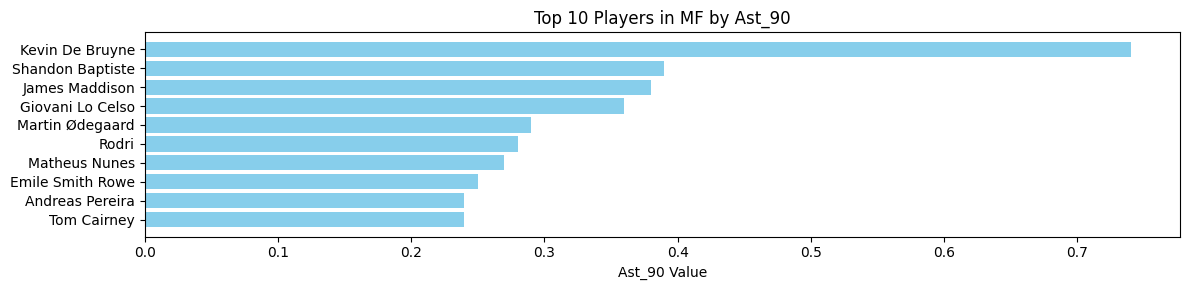

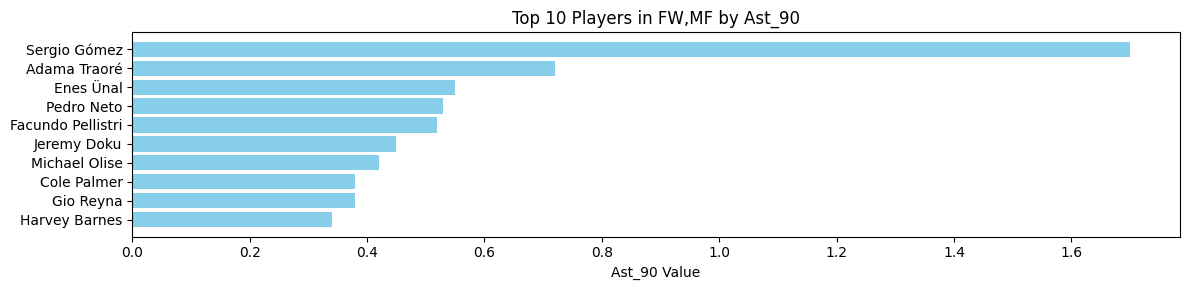

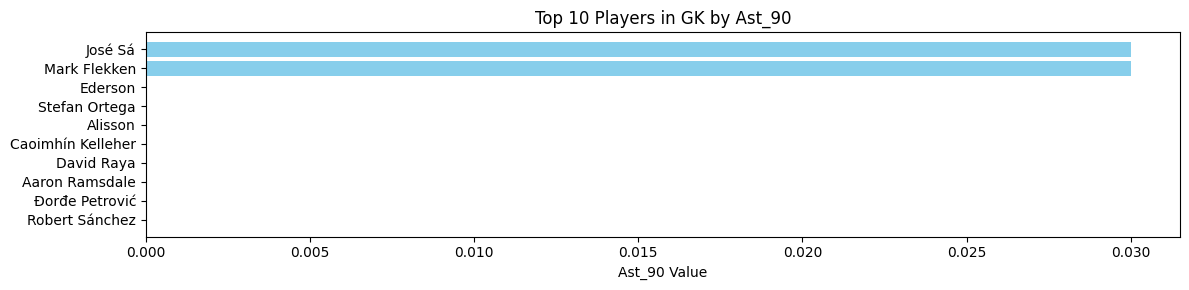

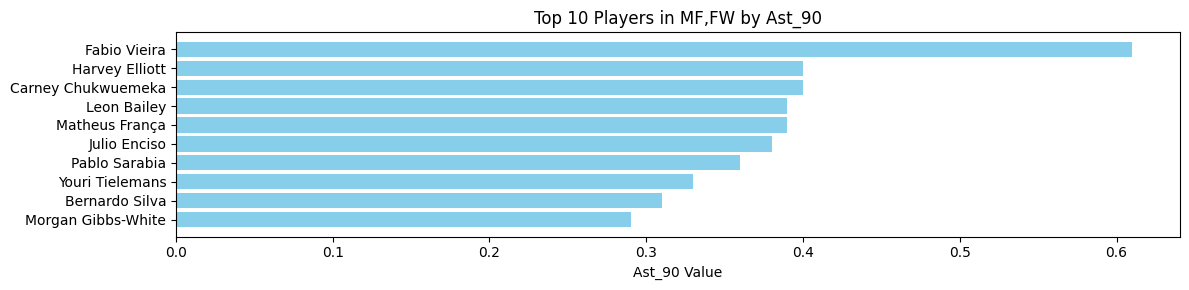

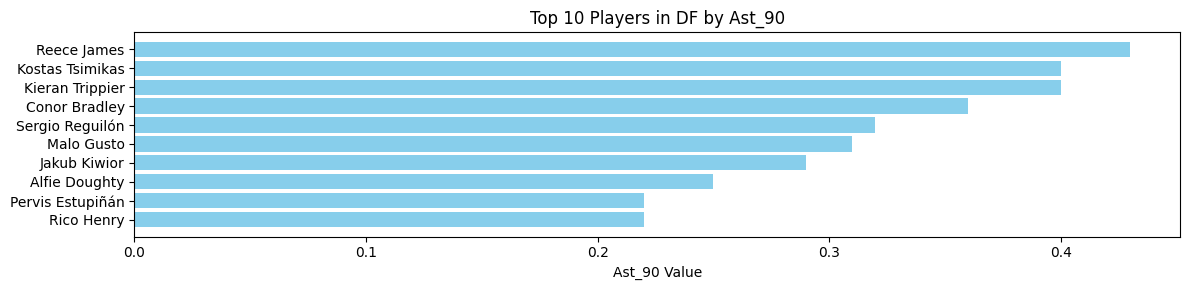

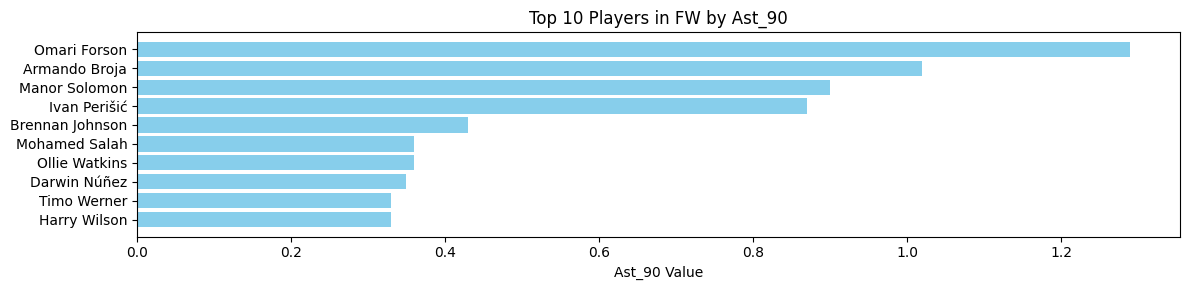

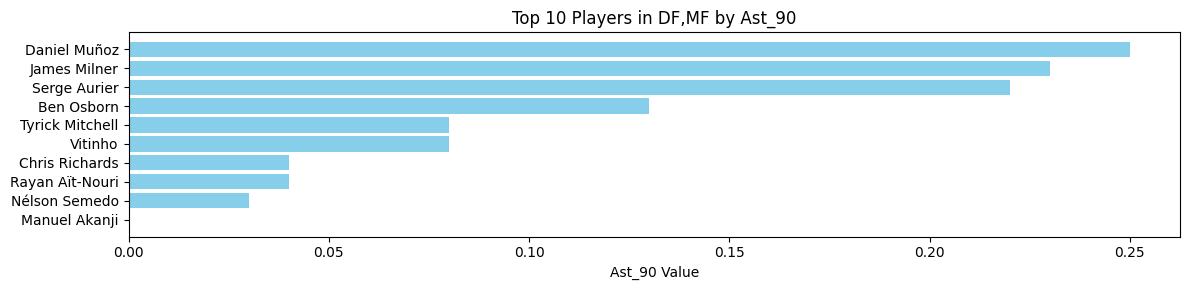

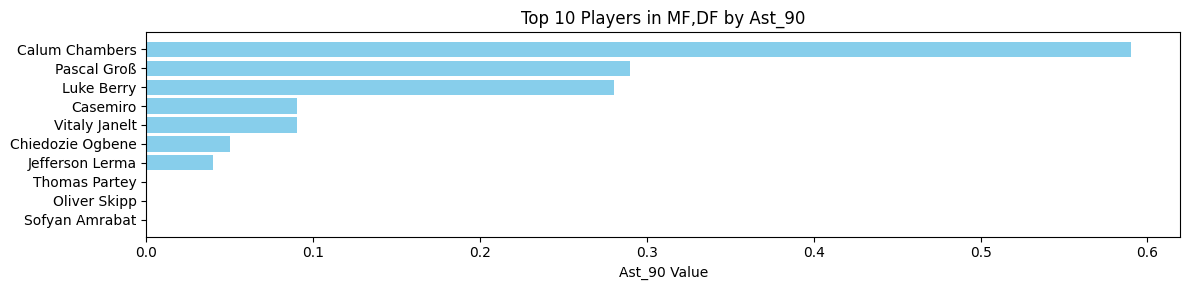

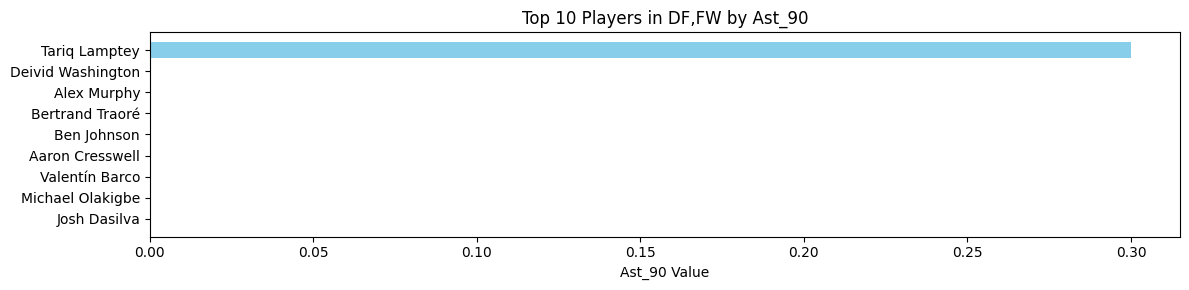

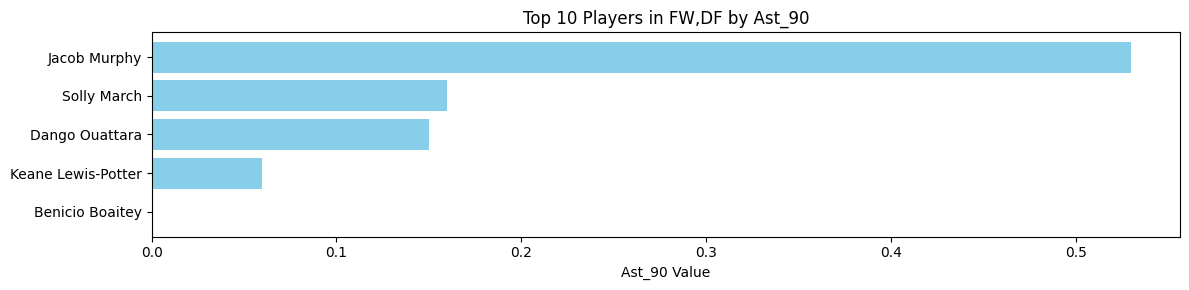

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure you have your DataFrame 'df' loaded with the relevant data
# For this example, I'm assuming 'df' is already defined and contains the data

def plot_top_players_by_pos(df, metric='Ast_90', top_n=10):
    # Get unique positions
    positions = df['Pos'].unique()

    for position in positions:
        # Filter data for the current position
        position_df = df[df['Pos'] == position]

        # Sort by the selected metric in descending order and get top N players
        top_players_df = position_df.nlargest(top_n, metric)

        # Create a bar chart for the top players
        plt.figure(figsize=(12, 3))
        plt.barh(top_players_df['Player'], top_players_df[metric], color='skyblue')
        plt.xlabel(f'{metric} Value')
        plt.title(f'Top {top_n} Players in {position} by {metric}')
        plt.gca().invert_yaxis()  # Invert y-axis to show the highest value on top
        plt.tight_layout()
        plt.show()

# Call the function to plot top players by position
plot_top_players_by_pos(df, metric='Ast_90', top_n=10)


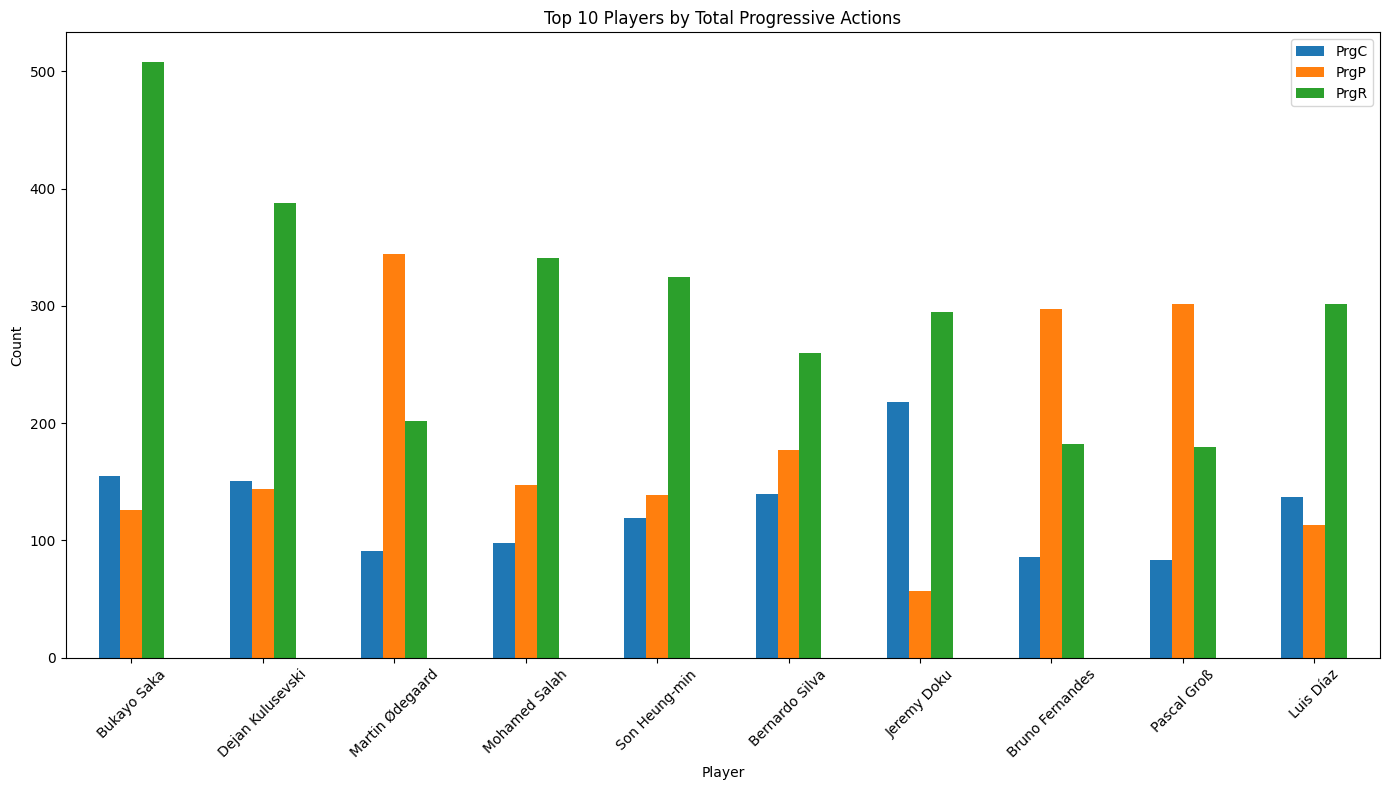

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (make sure you have your actual DataFrame loaded)
# df = pd.read_csv('your_data.csv')  # Adjust this line as necessary

def plot_progressive_actions(df, top_n=10):
    # Calculate total progressive actions
    df['Total_Prgrs'] = df[['PrgC', 'PrgP', 'PrgR']].sum(axis=1)

    # Sort players by total progressive actions
    top_players_df = df.nlargest(top_n, 'Total_Prgrs')

    # Create a DataFrame for plotting progressive actions
    progressive_actions_df = top_players_df[['Player', 'PrgC', 'PrgP', 'PrgR']]

    # Plot progressive actions for top players
    progressive_actions_df.set_index('Player').plot(kind='bar', figsize=(14, 8))
    plt.title(f'Top {top_n} Players by Total Progressive Actions')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function to plot top players by progressive actions
plot_progressive_actions(df, top_n=10)




---

# Positional Analysis

---



Summary of What I’ve Done:
1.   Position-Based Metrics: I calculated and visualized the average goals,assists, and progressive actions by position.
2.   Scatter Plots: I compared goals vs. assists and progressive carries vs. passes to see how different positions perform.
3.   Box Plots: I analyzed the distribution of key statistics like goals and progressive carries by position.



In [ ]:
# Grouping by position and calculating mean for relevant metrics
position_metrics = df.groupby('Pos')[['Gls', 'Ast', 'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR']].mean()
# Display the summary
position_metrics.sort_values(by='Gls', ascending=False)


,Gls,Ast,xG,xAG,PrgC,PrgP,PrgR
Pos,,,,,,,
FW,4.863158,2.031579,4.970526,2.078947,34.578947,30.610526,91.684211
"FW,MF",4.203390,2.406780,3.771186,2.320339,44.372881,44.576271,94.559322
"MF,FW",2.857143,2.346939,2.824490,2.373469,35.326531,56.714286,74.122449
"FW,DF",2.000000,2.200000,2.600000,1.860000,30.200000,29.000000,76.800000
MF,1.415929,1.566372,1.446018,1.616814,19.672566,73.840708,31.876106
DF,0.900000,1.052941,0.910588,1.043529,19.864706,61.241176,31.111765
"MF,DF",0.722222,1.055556,1.216667,1.227778,17.722222,51.777778,33.555556
"DF,MF",0.500000,0.818182,0.750000,0.950000,23.272727,47.818182,49.545455
"DF,FW",0.000000,0.333333,0.155556,0.222222,8.888889,9.555556,16.222222


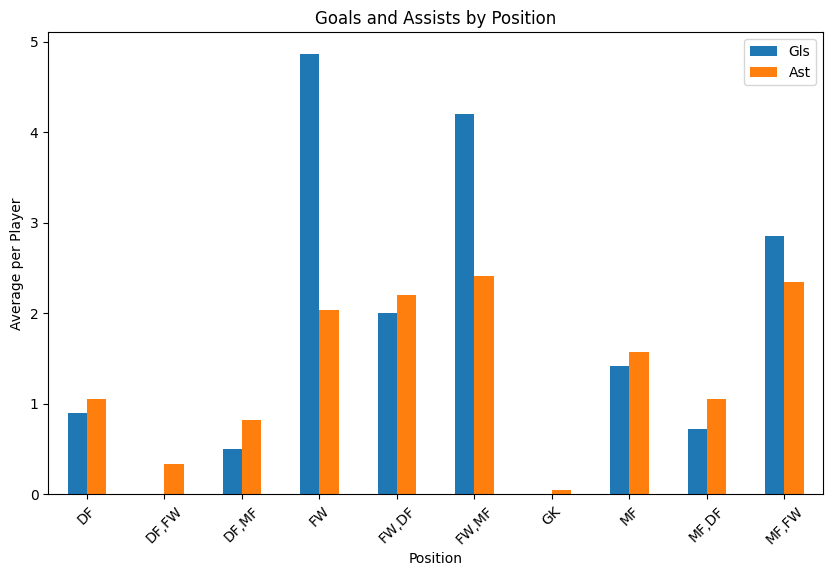

In [ ]:
# Plotting goals and assists by position
position_metrics[['Gls', 'Ast']].plot(kind='bar', figsize=(10, 6))
plt.title('Goals and Assists by Position')
plt.xlabel('Position')
plt.ylabel('Average per Player')
plt.xticks(rotation=45)
plt.show()

We can see that all positions have Asists more than goal expect FW and MF

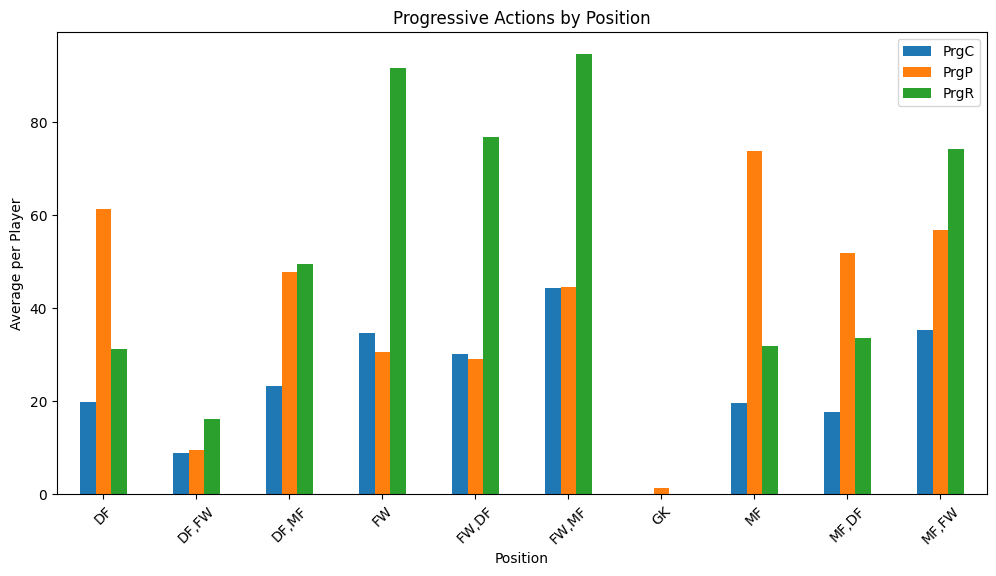

In [ ]:
# Plotting Progressive Carries, Passes, and Runs by position
position_metrics[['PrgC', 'PrgP', 'PrgR']].plot(kind='bar', figsize=(12, 6))
plt.title('Progressive Actions by Position')
plt.xlabel('Position')
plt.ylabel('Average per Player')
plt.xticks(rotation=45)
plt.show()


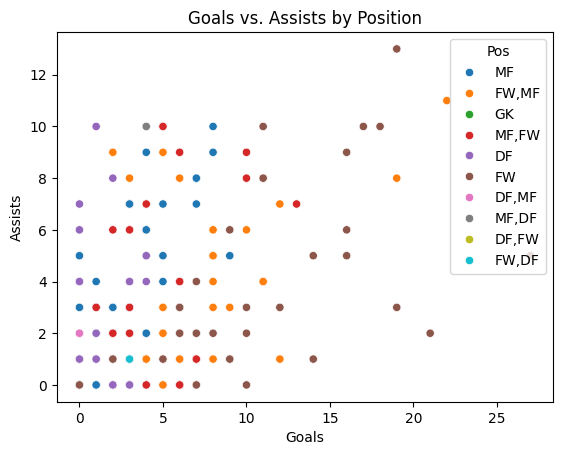

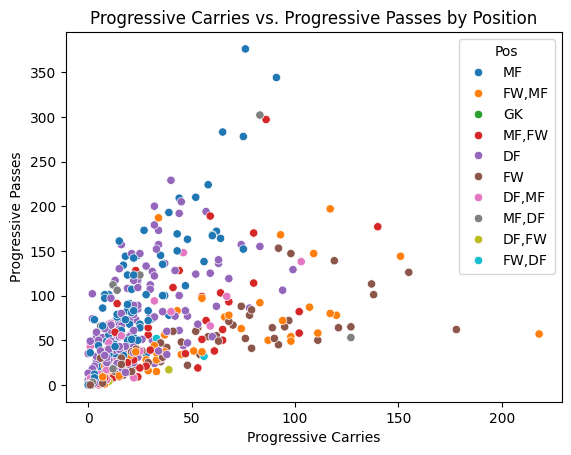

In [ ]:
# Scatter plot comparing goals and assists across positions
sns.scatterplot(data=df, x='Gls', y='Ast', hue='Pos')
plt.title('Goals vs. Assists by Position')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.show()

# Scatter plot comparing Progressive Carries vs. Progressive Passes across positions
sns.scatterplot(data=df, x='PrgC', y='PrgP', hue='Pos')
plt.title('Progressive Carries vs. Progressive Passes by Position')
plt.xlabel('Progressive Carries')
plt.ylabel('Progressive Passes')
plt.show()


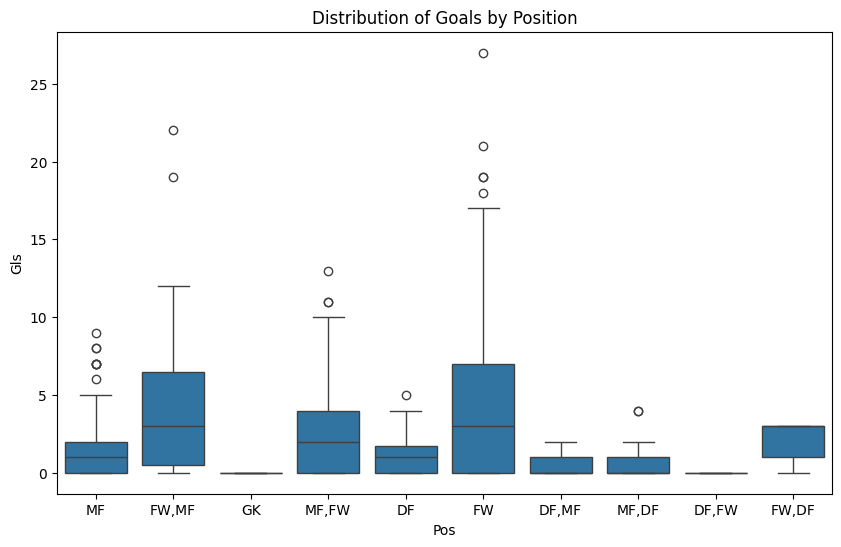

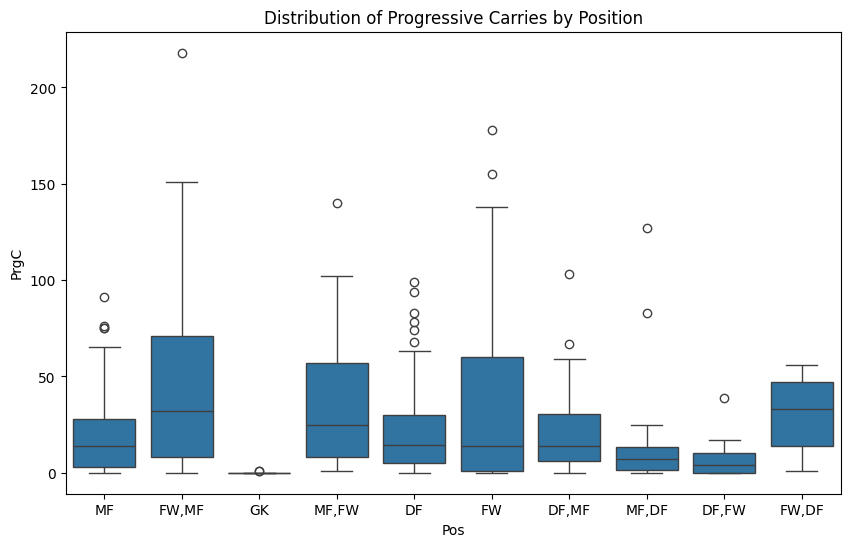

In [ ]:
# Box plot for goals by position
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pos', y='Gls')
plt.title('Distribution of Goals by Position')
plt.show()

# Box plot for Progressive Carries by position
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pos', y='PrgC')
plt.title('Distribution of Progressive Carries by Position')
plt.show()




---

#Team Performance Analysis

---



Summary of What I’ve Done:
1.   Team Contribution to Goals and Assists
2.   Team Disciplinary Records





                    Gls   Ast   CrdY  CrdR
Team                                      
Manchester City    94.0  69.0   53.0   2.0
Arsenal            86.0  62.0   64.0   2.0
Newcastle United   83.0  55.0   79.0   1.0
Liverpool          80.0  60.0   69.0   5.0
Chelsea            76.0  51.0  108.0   4.0
Aston Villa        72.0  55.0   94.0   2.0
Tottenham Hotspur  69.0  58.0   92.0   4.0
West Ham United    58.0  40.0   82.0   3.0
Manchester United  57.0  36.0   83.0   1.0
Crystal Palace     56.0  43.0   73.0   2.0
Fulham             54.0  40.0   83.0   4.0
Brentford          54.0  38.0   89.0   2.0
Bournemouth        52.0  39.0   79.0   3.0
Brighton           50.0  36.0   90.0   3.0
Luton Town         49.0  33.0   71.0   0.0
Nottingham Forest  49.0  43.0   82.0   3.0
Wolverhampton      47.0  36.0  102.0   4.0
Burnley            40.0  30.0   77.0   7.0
Everton            40.0  17.0   82.0   1.0
Sheffield United   31.0  18.0  101.0   5.0


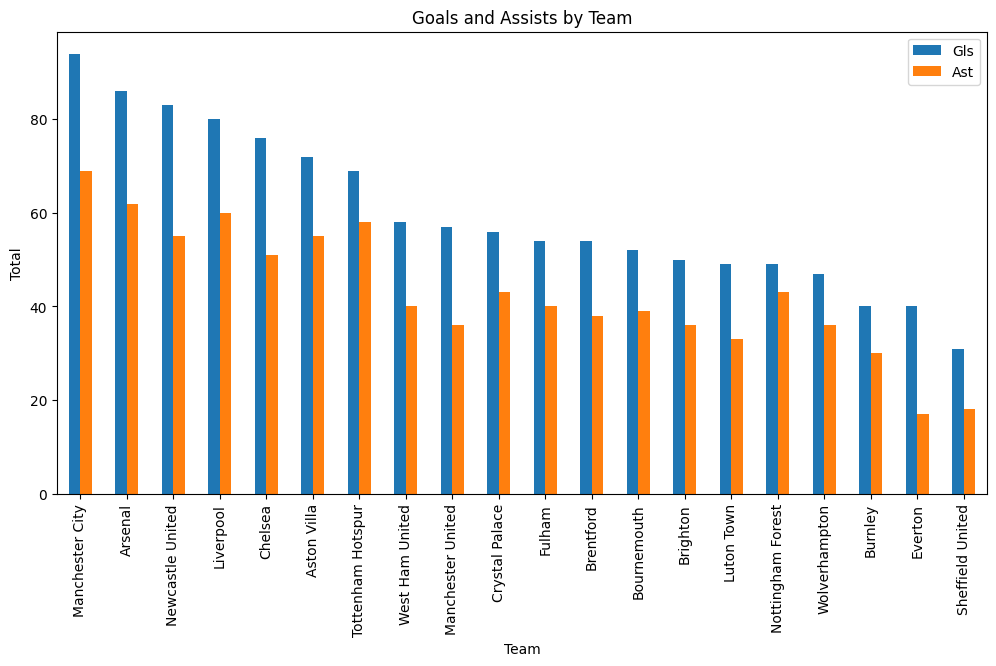

In [ ]:
# Grouping by team and calculating the sum for relevant metrics
team_performance = df.groupby('Team').sum()[['Gls', 'Ast', 'CrdY', 'CrdR']]

# Sorting the teams by total goals scored
team_performance_sorted = team_performance.sort_values(by='Gls', ascending=False)
print(team_performance_sorted)

# Plotting team goals and assists
team_performance_sorted[['Gls', 'Ast']].plot(kind='bar', figsize=(12, 6))
plt.title('Goals and Assists by Team')
plt.xlabel('Team')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.show()


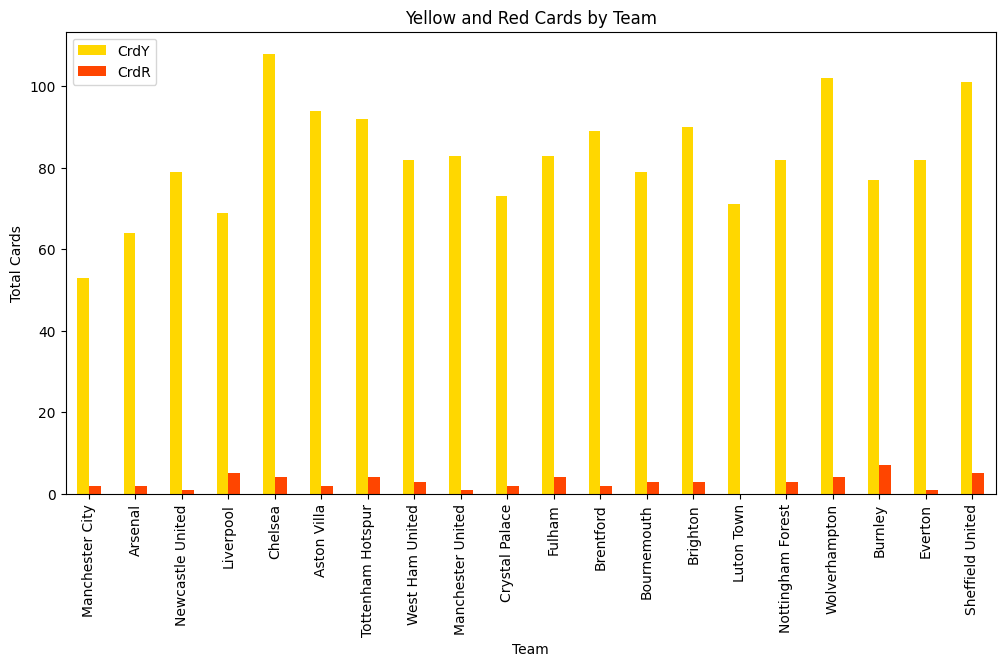

In [ ]:
# Plotting team yellow and red cards
team_performance_sorted[['CrdY', 'CrdR']].plot(kind='bar', figsize=(12, 6), color=['#FFD700', '#FF4500'])
plt.title('Yellow and Red Cards by Team')
plt.xlabel('Team')
plt.ylabel('Total Cards')
plt.xticks(rotation=90)
plt.show()



---
#Age Analysis
---



Summary of What I’ve Done:
1.   Age Distribution
2.   Age vs. Goals
3.   Age vs. Assists
4.   Age vs. Minutes Played


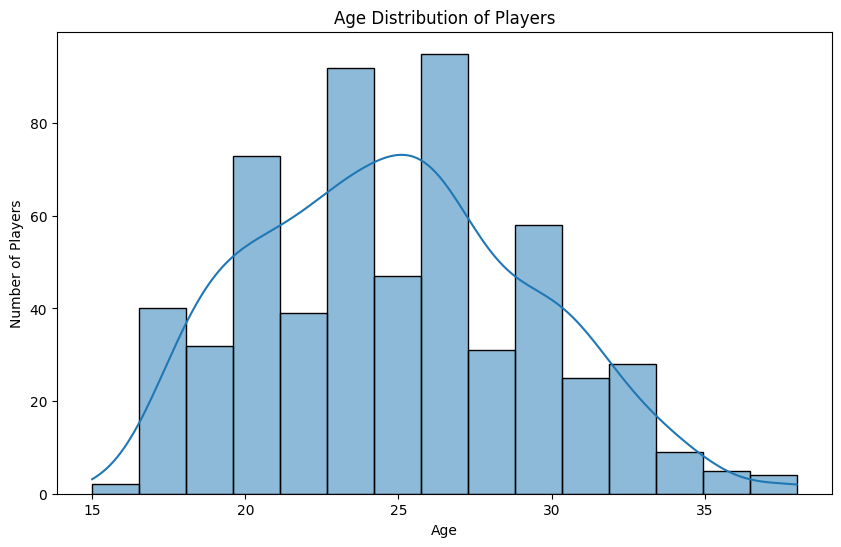

In [ ]:
# Plotting the age distribution of players
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()


Age vs. Performance Metrics

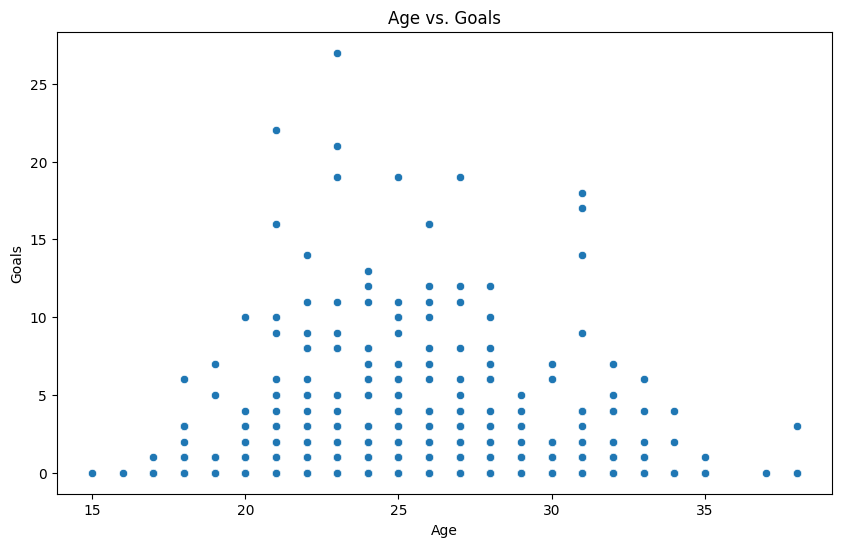

In [ ]:
# Scatter plot: Age vs. Goals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Gls', data=df)
plt.title('Age vs. Goals')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.show()



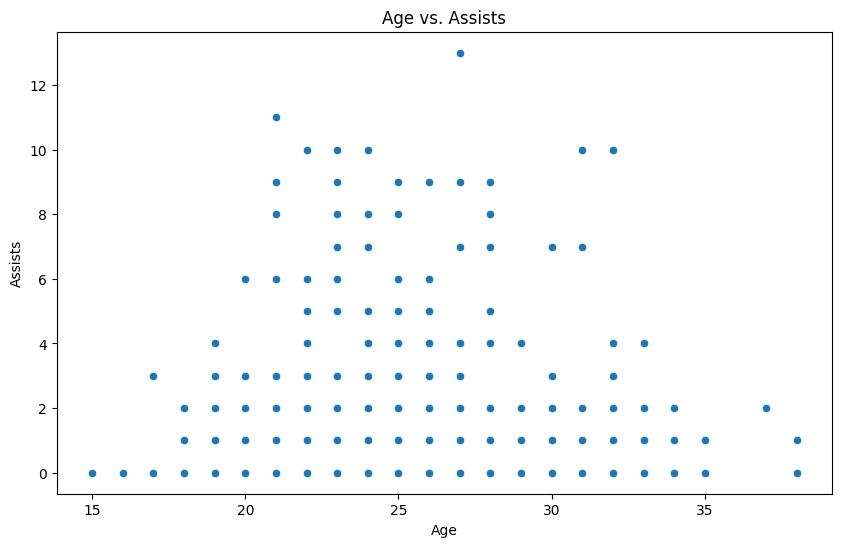

In [ ]:
# Scatter plot: Age vs. Assists
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Ast', data=df)
plt.title('Age vs. Assists')
plt.xlabel('Age')
plt.ylabel('Assists')
plt.show()


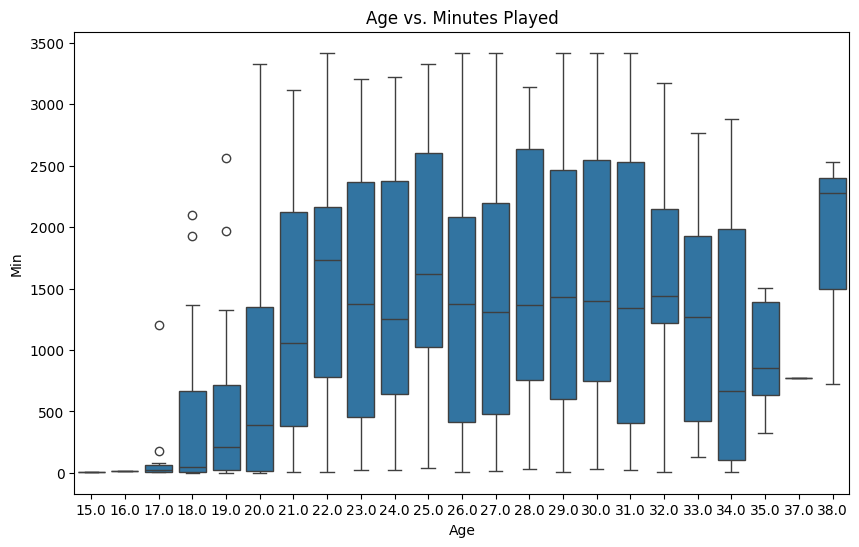

In [ ]:
# Box plot: Age vs. Minutes Played
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Min', data=df)
plt.title('Age vs. Minutes Played')
plt.show()




---

# Card Analysis

---



In [ ]:
# Calculate average cards across all players
average_crdy = df['CrdY'].mean()
average_crdr = df['CrdR'].mean()

# Function to display card metrics and plot comparison
def display_cards(player_name):
    if player_name in df['Player'].values:
        player_data = df[df['Player'] == player_name].iloc[0]
        position = player_data['Pos']
        crdy = player_data['CrdY']
        crdr = player_data['CrdR']

        print(f"Position: {position}")
        print(f"Yellow Cards: {crdy}")
        print(f"Red Cards: {crdr}")

        # Create a DataFrame for plotting
        metrics_df = pd.DataFrame({
            'Metric': ['Yellow Cards', 'Red Cards'],
            'Player Value': [crdy, crdr],
            'Average Value': [average_crdy, average_crdr]
        })

        # Plotting
        plt.figure(figsize=(10, 6))
        ax = metrics_df.set_index('Metric').plot(kind='bar', figsize=(12, 6), rot=0, color=['Blue', 'red'])
        plt.title(f'Comparison of {player_name} with Average Cards')
        plt.ylabel('Number of Cards')
        plt.legend(title='Metric')
        plt.tight_layout()
        plt.show()

    else:
        print("Player not found.")

# Create a dropdown widget for player names
player_dropdown = widgets.Dropdown(
    options=df['Player'].tolist(),
    description='Player:',
    disabled=False,
)

# Create an output widget to display the result
output = widgets.Output()

# Function to update the output based on dropdown selection
def on_player_selected(change):
    with output:
        output.clear_output()
        display_cards(change.new)

# Attach the function to the dropdown widget
player_dropdown.observe(on_player_selected, names='value')

# Display the widgets
display(player_dropdown, output)


Dropdown(description='Player:', options=('Rodri', 'Phil Foden', 'Ederson', 'Julián Álvarez', 'Kyle Walker', 'B…

Output()

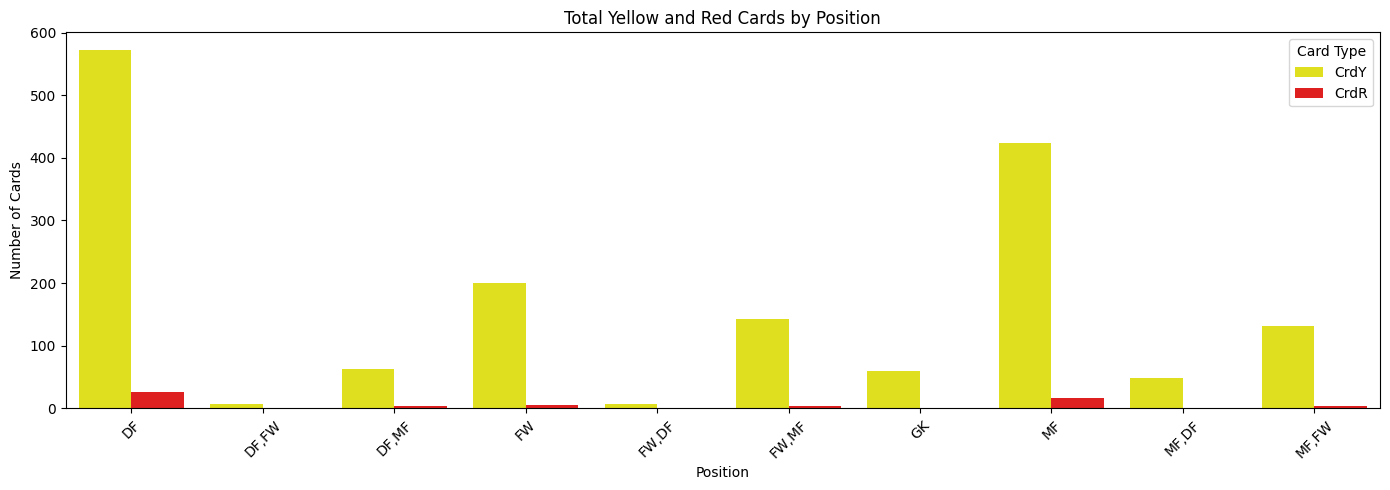

In [ ]:
# Aggregate total yellow and red cards by position
cards_by_pos = df.groupby('Pos')[['CrdY', 'CrdR']].sum().reset_index()

# Reshape the DataFrame for better plotting
cards_by_pos_melted = cards_by_pos.melt(id_vars='Pos', var_name='Card Type', value_name='Number of Cards')

# Set custom colors: yellow for CrdY and red for CrdR
custom_palette = {'CrdY': 'yellow', 'CrdR': 'red'}

# Plotting
plt.figure(figsize=(14, 5))

# Create a grouped bar chart with custom colors
sns.barplot(data=cards_by_pos_melted, x='Pos', y='Number of Cards', hue='Card Type', palette=custom_palette)

plt.title('Total Yellow and Red Cards by Position')
plt.xlabel('Position')
plt.ylabel('Number of Cards')
plt.legend(title='Card Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-211-53b554cffdd9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_players, x='Player', y='Total_Cards', palette='Set1')


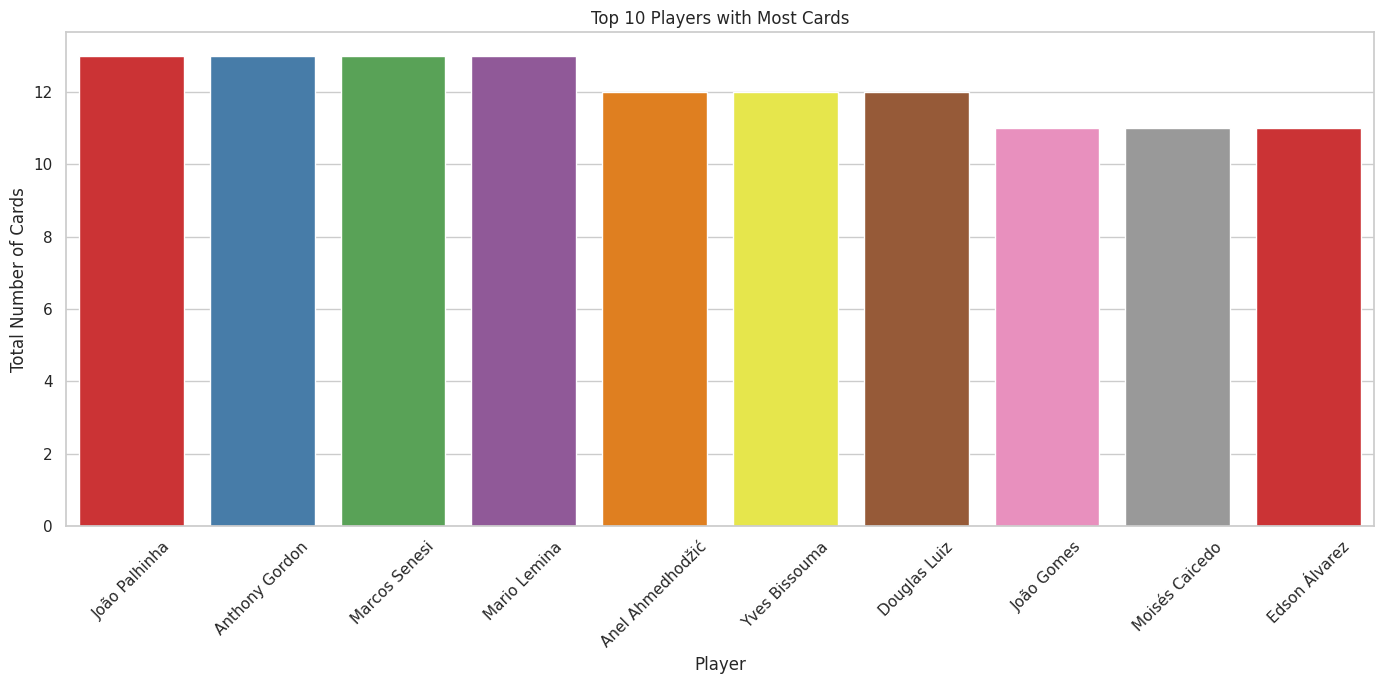

In [ ]:

# Calculate total cards (yellow + red) for each player
df['Total_Cards'] = df['CrdY'] + df['CrdR']

# Sort players by total cards and select top 10
top_10_players = df.sort_values(by='Total_Cards', ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 7))

# Create a bar chart for the top 10 players with the most cards
sns.barplot(data=top_10_players, x='Player', y='Total_Cards', palette='Set1')

plt.title('Top 10 Players with Most Cards')
plt.xlabel('Player')
plt.ylabel('Total Number of Cards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-212-d967f7fa6ea8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_avg_cards_per_min, x='Player', y='Cards_per_Min', palette='Set2')


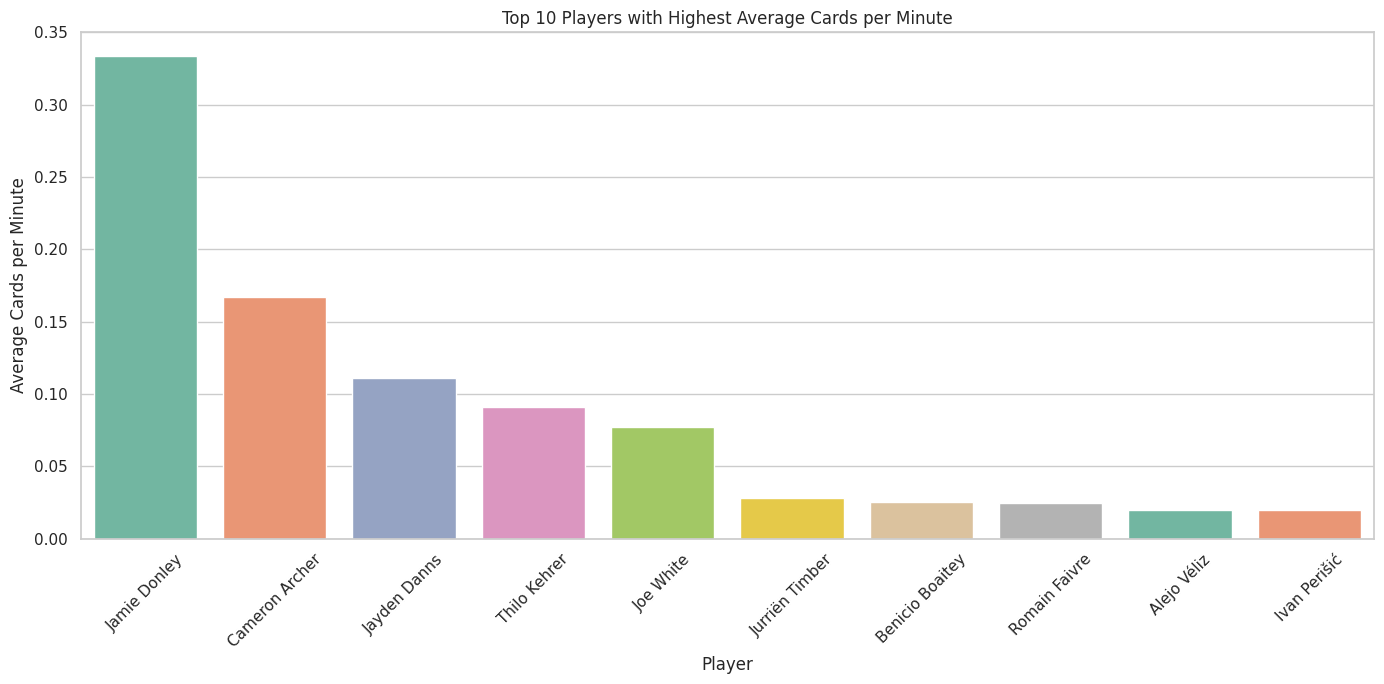

In [ ]:

# Calculate total cards (yellow + red) for each player
df['Total_Cards'] = df['CrdY'] + df['CrdR']

# Calculate average cards per minute
df['Cards_per_Min'] = df['Total_Cards'] / df['Min']

# Sort players by average cards per minute and select top 10
top_10_avg_cards_per_min = df.sort_values(by='Cards_per_Min', ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 7))

# Create a bar chart for the top 10 players with the highest average cards per minute
sns.barplot(data=top_10_avg_cards_per_min, x='Player', y='Cards_per_Min', palette='Set2')

plt.title('Top 10 Players with Highest Average Cards per Minute')
plt.xlabel('Player')
plt.ylabel('Average Cards per Minute')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




---

# Advanced Metrics
---



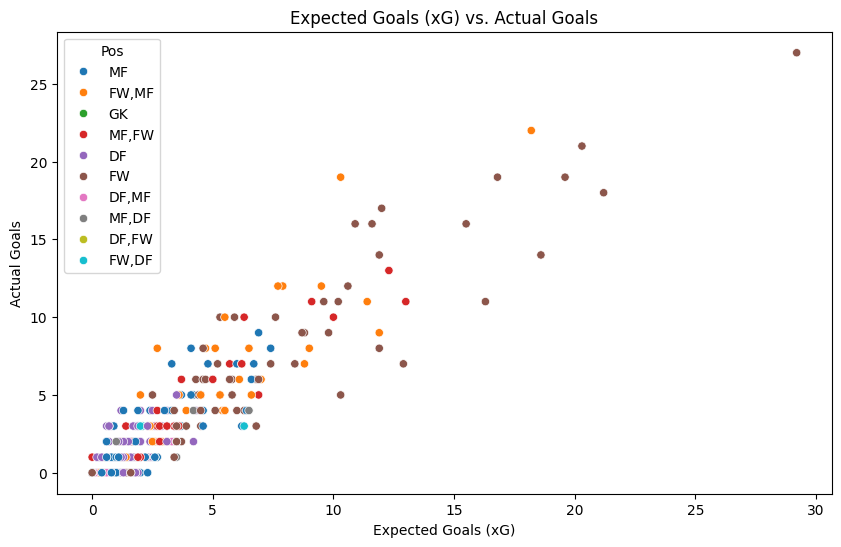

In [ ]:
# Scatter plot: xG vs. Actual Goals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xG', y='Gls', data=df, hue='Pos')
plt.title('Expected Goals (xG) vs. Actual Goals')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals')
plt.show()


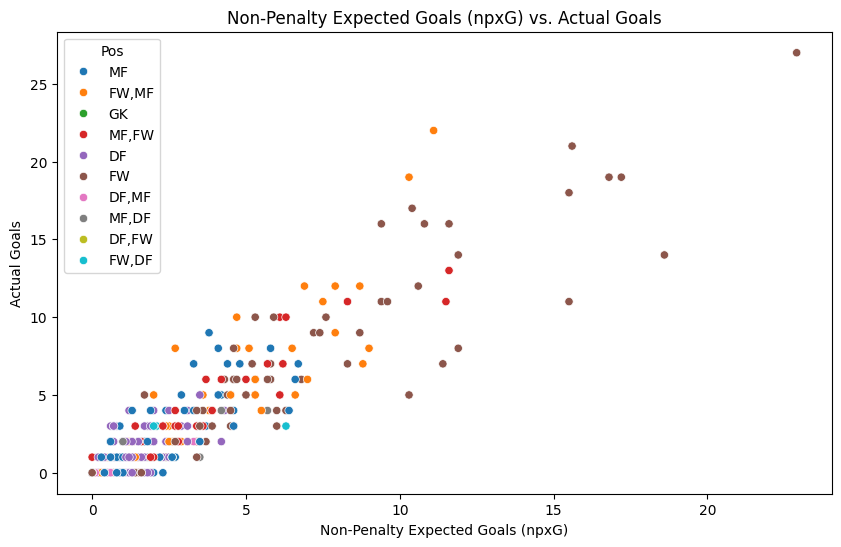

In [ ]:

# Scatter plot: npxG vs. Actual Goals (excluding penalties)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='npxG', y='Gls', data=df, hue='Pos')
plt.title('Non-Penalty Expected Goals (npxG) vs. Actual Goals')
plt.xlabel('Non-Penalty Expected Goals (npxG)')
plt.ylabel('Actual Goals')
plt.show()

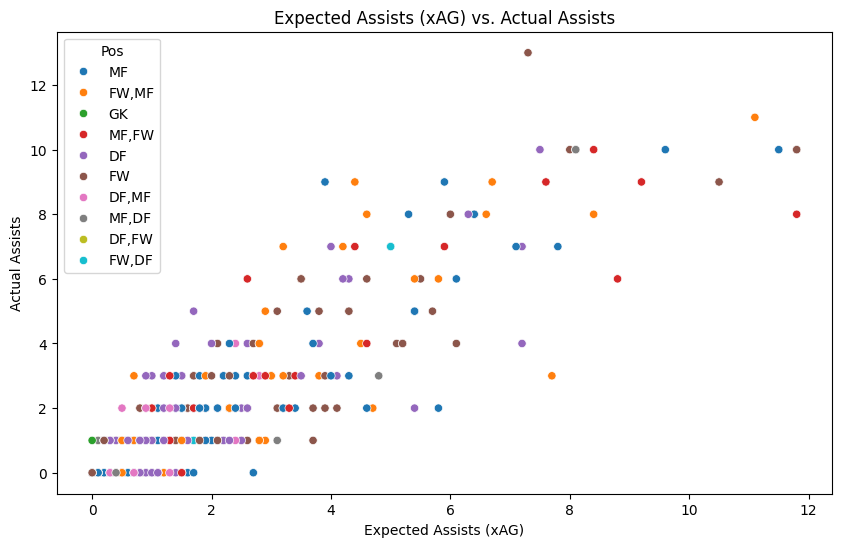

In [ ]:
# Scatter plot: xAG vs. Actual Assists
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xAG', y='Ast', data=df, hue='Pos')
plt.title('Expected Assists (xAG) vs. Actual Assists')
plt.xlabel('Expected Assists (xAG)')
plt.ylabel('Actual Assists')
plt.show()


# ML model to predect goals

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Selecting features and target variable
features = ['Age', 'Min', 'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR', 'CrdY', 'CrdR', 'G+A']
target = 'Gls'

X = df[features]
y = df[target]

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_gls, test_size=0.2, random_state=42)

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.56
R-squared: 0.97


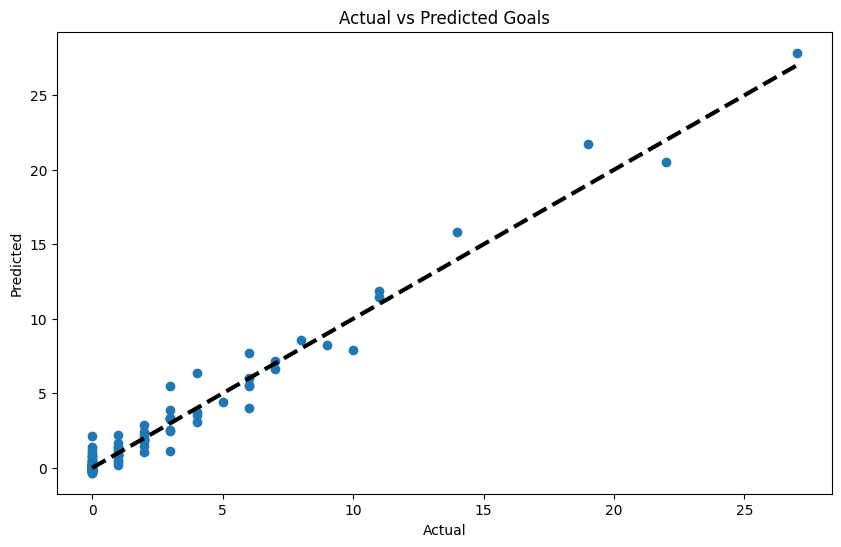

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Goals')
plt.show()


# ML model to predect Asists

In [ ]:
# Selecting features and target variable
features = ['Age', 'Min', 'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR', 'CrdY', 'CrdR', 'G+A']
target = 'Ast'

X = df[features]
y = df[target]

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_gls, test_size=0.2, random_state=42)

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.56
R-squared: 0.97


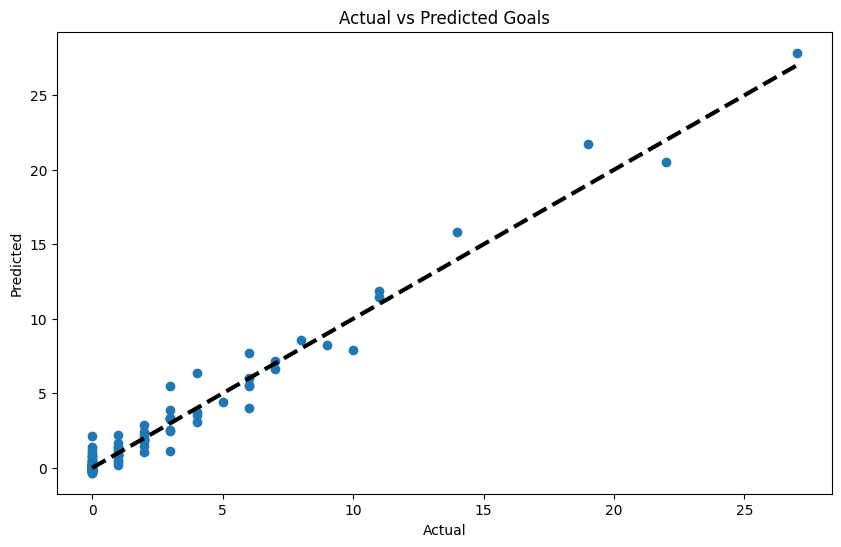

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Goals')
plt.show()


# Clustering: Grouping Players by Similarity

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Selecting features for clustering
features = ['Age', 'Min', 'Gls', 'Ast', 'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR', 'CrdY', 'CrdR']

X = df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


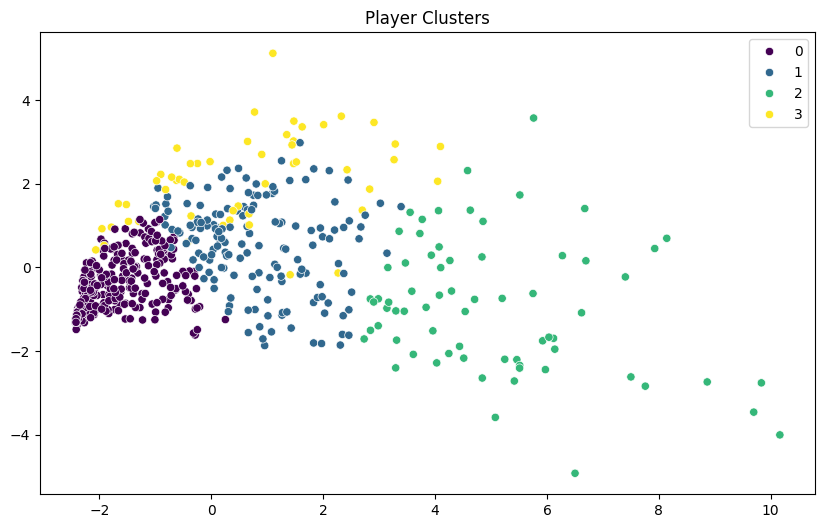

[[-0.19126977 -0.73207393 -0.46467363 -0.50413008 -0.46945663 -0.54609941
  -0.56297833 -0.61268827 -0.53162917 -0.60616265 -0.31568395]
 [ 0.26872059  0.72775769  0.10081998  0.04095712  0.12398982  0.09991633
   0.18775887  0.4362446   0.16183984  0.63392257 -0.31568395]
 [ 0.00462696  1.14663438  1.84097081  2.057198    1.81303809  2.13002213
   1.8718545   1.26279033  1.98700652  0.63682565 -0.17843006]
 [ 0.25798298  0.42060135 -0.09204347  0.03250013 -0.09930603 -0.00616215
   0.1611616   0.48486908 -0.09104176  0.66603783  3.02328092]]


In [ ]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the original data
df['Cluster'] = clusters

# Plot the clusters (if PCA was applied)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Player Clusters')
plt.show()

# Display the cluster centers (interpretation of clusters)
print(kmeans.cluster_centers_)
